# 📊 Stock Market Analysis & E
## NIFTY 50 Stock Price Prediction - Exploratory Data Analys
This notebook contains comprehensive exploratory data analysis for the stock prediction project.

In [34]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
import sys
import os
from datetime import datetime, timedelta

# Add src to path
sys.path.append('src')

# Import custom modules
from src.data import get_nifty50_stocks, load_stock_data, download_stock_data
from src.features import add_technical_indicators, prepare_features
from src.inference import StockPricePredictor

# Settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📈 Stock Market Analysis Environment Ready!")

📈 Stock Market Analysis Environment Ready!


## 1. 📋 Data Loading & Overview

In [35]:
# Load NIFTY 50 stocks
nifty50_stocks = get_nifty50_stocks()
print(f"🎯 Total NIFTY 50 stocks: {len(nifty50_stocks)}")
print("nFirst 10 stocks:")
for i, stock in enumerate(nifty50_stocks[:10], 1):
    print(f"{i:2d}. {stock}")

⚠️ NSE API failed, using fallback list
🎯 Total NIFTY 50 stocks: 50
nFirst 10 stocks:
 1. RELIANCE.NS
 2. TCS.NS
 3. HDFCBANK.NS
 4. INFY.NS
 5. ICICIBANK.NS
 6. HINDUNILVR.NS
 7. ITC.NS
 8. SBIN.NS
 9. BHARTIARTL.NS
10. ASIANPAINT.NS


In [36]:
# Load sample stock data for analysis
sample_stocks = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS']
stock_data = {}

for stock in sample_stocks:
    df = load_stock_data(stock)
    if df is not None:
        stock_data[stock.replace('.NS', '')] = df
        print(f"✅ Loaded {stock}: {len(df)} records from {df.index.min()} to {df.index.max()}")
    else:
        print(f"❌ Failed to load {stock}")

print(f"📊 Successfully loaded {len(stock_data)} stocks for analysis")

✅ Loaded RELIANCE.NS: 6409 records from 0 to 6408
✅ Loaded TCS.NS: 5730 records from 0 to 5729
✅ Loaded HDFCBANK.NS: 6412 records from 0 to 6411
✅ Loaded INFY.NS: 6412 records from 0 to 6411
✅ Loaded ICICIBANK.NS: 5759 records from 0 to 5758
📊 Successfully loaded 5 stocks for analysis


## 2. 📈 Basic Statistics & Data Quality

In [37]:
# Display basic info for each stock
for stock_name, df in stock_data.items():
    print(f"n{'='*50}")
    print(f"📊 {stock_name} - Data Summary")
    print(f"{'='*50}")
    print(f"Shape: {df.shape}")
    print(f"Date Range: {df.index.min()} to {df.index.max()}")
    print(f"Missing Values: {df.isnull().sum().sum()}")
    print("nPrice Statistics:")
    print(df[['Open', 'High', 'Low', 'Close', 'Volume']].describe())
    
    # Current price
    current_price = df['Close'].iloc[-1]
    year_high = df['High'].tail(252).max()  # 1 year high
    year_low = df['Low'].tail(252).min()    # 1 year low
    
    print(f"💰 Current Price: ₹{current_price:.2f}")
    print(f"📈 52-Week High: ₹{year_high:.2f}")
    print(f"📉 52-Week Low: ₹{year_low:.2f}")

n==================================================
📊 RELIANCE - Data Summary
Shape: (6409, 9)
Date Range: 0 to 6408
Missing Values: 0
nPrice Statistics:
              Open         High          Low        Close        Volume
count  6409.000000  6409.000000  6409.000000  6409.000000  6.409000e+03
mean    386.080446   390.247847   381.645388   385.789647  3.399918e+07
std     430.946791   434.826509   426.904838   430.727833  3.787330e+07
min      10.813369    11.550046    10.373994    10.692345  0.000000e+00
25%      76.359203    76.944692    75.089832    76.265724  1.269061e+07
50%     203.682925   206.594187   200.881606   203.714264  2.019209e+07
75%     548.428492   554.498580   540.290895   547.628174  4.019708e+07
max    1592.662006  1596.980044  1573.851280  1589.138062  6.322896e+08
💰 Current Price: ₹1376.20
📈 52-Week High: ₹1544.83
📉 52-Week Low: ₹1110.42
n==================================================
📊 TCS - Data Summary
Shape: (5730, 9)
Date Range: 0 to 5729
Missing Val

## 3. 📊 Price Trends Visualization

In [38]:
# Create subplots for all stocks
fig = make_subplots(
    rows=len(stock_data), cols=1,
    subplot_titles=list(stock_data.keys()),
    vertical_spacing=0.05
)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, (stock_name, df) in enumerate(stock_data.items()):
    # Plot last 2 years of data
    recent_df = df.tail(500)  # approximately 2 years
    
    fig.add_trace(
        go.Scatter(
            x=recent_df.index,
            y=recent_df['Close'],
            mode='lines',
            name=stock_name,
            line=dict(color=colors[i], width=2)
        ),
        row=i+1, col=1
    )

fig.update_layout(
    height=300*len(stock_data),
    title_text= "📈 Stock Price Trends (Last 2 Years)",
    showlegend=False
)

fig.show()

In [53]:
# Normalized price comparison
fig = go.Figure()

for i, (stock_name, df) in enumerate(stock_data.items()):
    # Normalize prices to start from 100
    recent_df = df.tail(500)  # Last 2 years
    normalized_prices = (recent_df['Close'] / recent_df['Close'].iloc[0]) * 100
    
    fig.add_trace(
        go.Scatter(
            x=recent_df.index,
            y=normalized_prices,
            mode='lines',
            name=stock_name,
            line=dict(width=2)
        )
    )

fig.update_layout(
    title = "📊 Normalized Stock Performance (Base = 100)",
    xaxis_title = "Date",
    yaxis_title = "Normalized Price",
    height = 500,
    hovermode = 'x unified'
)

fig.show()

## 4. 📊 Volume Analysis

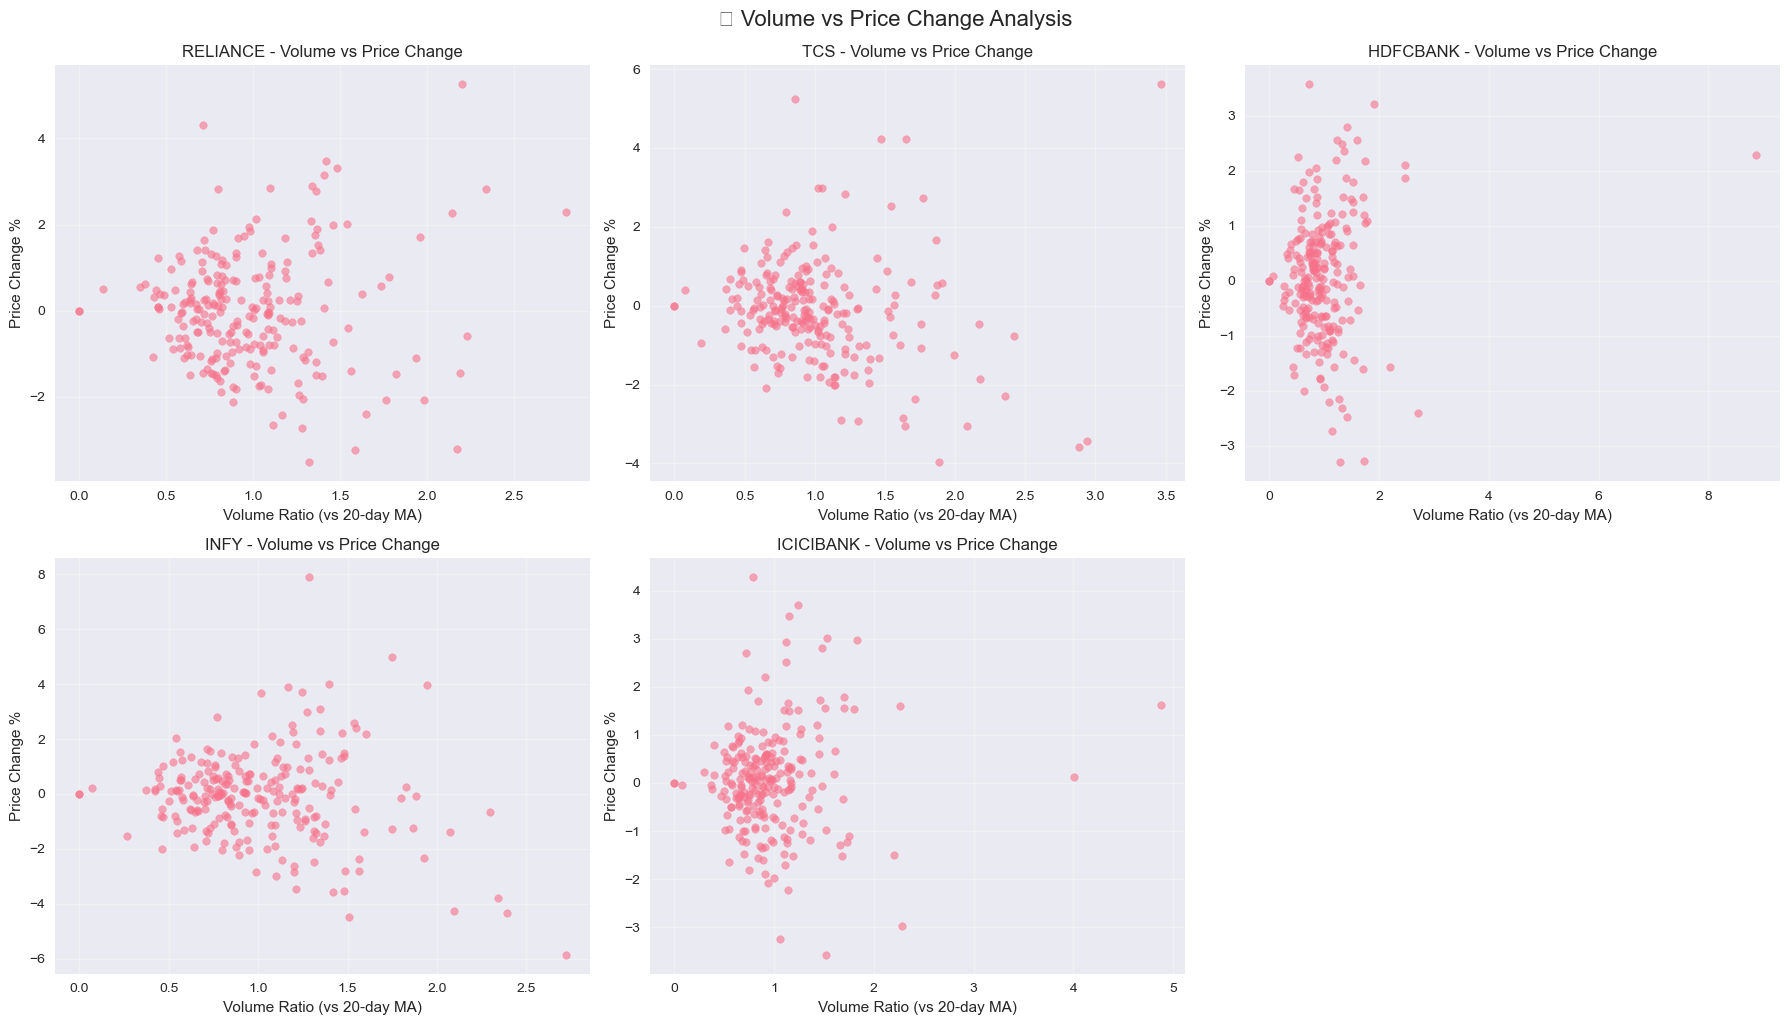

In [40]:
# Volume analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (stock_name, df) in enumerate(stock_data.items()):
    if i >= 6:
        break
    
    recent_df = df.tail(252)  # Last 1 year
    
    # Volume vs Price Change
    price_change = recent_df['Close'].pct_change() * 100
    volume_ma = recent_df['Volume'].rolling(20).mean()
    volume_ratio = recent_df['Volume'] / volume_ma
    
    axes[i].scatter(volume_ratio, price_change, alpha=0.6, s=30)
    axes[i].set_title(f'{stock_name} - Volume vs Price Change')
    axes[i].set_xlabel('Volume Ratio (vs 20-day MA)')
    axes[i].set_ylabel('Price Change %')
    axes[i].grid(True, alpha=0.3)

# Remove empty subplot
if len(stock_data) < 6:
    fig.delaxes(axes[len(stock_data)])

plt.tight_layout()
plt.suptitle('💹 Volume vs Price Change Analysis', fontsize=16, y=1.02)
plt.show()

## 5. 🔍 Technical Indicators Analysis

In [41]:
# Add technical indicators to one stock for detailed analysis,
sample_stock = 'RELIANCE',
if sample_stock in stock_data:
    df_with_indicators = add_technical_indicators(stock_data[sample_stock])
    
    print(f"📊 Technical Indicators for {sample_stock}:")
    print(f"Data shape with indicators: {df_with_indicators.shape}")
    print("nIndicators added:")
    
    indicator_cols = [col for col in df_with_indicators.columns if col not in ['Open', 'High', 'Low', 'Close', 'Volume', 'Symbol']]
    for col in indicator_cols:
        print(f"  • {col}")

    # Display correlation matrix
    print("n🔗 Correlation Matrix (Key Indicators):")
    key_cols = ['Close', 'Volume', 'RSI', 'MACD', 'SMA_20', 'EMA_12']
    corr_matrix = df_with_indicators[key_cols].corr()
    print(corr_matrix)

In [42]:
# Simple Moving Average (20-day)
df_with_indicators['SMA_20'] = df_with_indicators['Close'].rolling(window=20).mean()

# Exponential Moving Average (12-day)
df_with_indicators['EMA_12'] = df_with_indicators['Close'].ewm(span=12, adjust=False).mean()

# RSI (14-day)
delta = df_with_indicators['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df_with_indicators['RSI'] = 100 - (100 / (1 + rs))

# MACD (12-26) and Signal (9)
ema12 = df_with_indicators['Close'].ewm(span=12, adjust=False).mean()
ema26 = df_with_indicators['Close'].ewm(span=26, adjust=False).mean()
df_with_indicators['MACD'] = ema12 - ema26
df_with_indicators['MACD_Signal'] = df_with_indicators['MACD'].ewm(span=9, adjust=False).mean()

In [43]:
# Visualize technical indicators
recent_data = df_with_indicators.tail(200)  # Last 200 days

# Create subplots
fig = make_subplots(
    rows=4, cols=1,
    subplot_titles=['Price & Moving Averages', 'Volume', 'RSI', 'MACD'],
    vertical_spacing=0.08,
    row_heights=[0.4, 0.2, 0.2, 0.2]
)

# 1. Price and Moving Averages
fig.add_trace(
    go.Candlestick(
        x=recent_data.index,
        open=recent_data['Open'],
        high=recent_data['High'],
        low=recent_data['Low'],
        close=recent_data['Close'],
        name='Price'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=recent_data.index, y=recent_data['SMA_20'], 
               mode='lines', name='SMA 20', line=dict(color='orange')),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=recent_data.index, y=recent_data['EMA_12'], 
               mode='lines', name='EMA 12', line=dict(color='red')),
    row=1, col=1
)

# 2. Volume
fig.add_trace(
    go.Bar(x=recent_data.index, y=recent_data['Volume'], 
           name='Volume', marker_color='lightblue'),
    row=2, col=1
)

# 3. RSI
fig.add_trace(
    go.Scatter(x=recent_data.index, y=recent_data['RSI'], 
               mode='lines', name='RSI', line=dict(color='purple')),
    row=3, col=1
)

# RSI reference lines
fig.add_hline(y=70, line_dash = "dash", line_color = "red", row=3, col=1)
fig.add_hline(y=30, line_dash= "dash", line_color = "green", row=3, col=1)

# 4. MACD
fig.add_trace(
    go.Scatter(x=recent_data.index, y=recent_data['MACD'], 
               mode='lines', name='MACD', line=dict(color='blue')),
    row=4, col=1
)

fig.add_trace(
    go.Scatter(x=recent_data.index, y=recent_data['MACD_Signal'], 
               mode='lines', name='MACD Signal', line=dict(color='red')),
    row=4, col=1
)

fig.update_layout(
    height=800,
    title=f"🔍 Technical Analysis - {sample_stock} (Last 200 Days)",
    showlegend=True
)

fig.show()

## 6. 📈 Return Analysis

In [44]:
# Calculate returns for all stocks
returns_data = {}

for stock_name, df in stock_data.items():
    # Daily returns
    daily_returns = df['Close'].pct_change() * 100
    returns_data[stock_name] = daily_returns.dropna()

# Create returns DataFrame
returns_df = pd.DataFrame(returns_data)

print("📊 Returns Statistics:")
print(returns_df.describe())

📊 Returns Statistics:
          RELIANCE          TCS     HDFCBANK         INFY    ICICIBANK
count  6408.000000  5729.000000  6411.000000  6411.000000  5758.000000
mean      0.134431     0.123639     0.097254     0.071390     0.103825
std       4.794551     3.581715     1.913419     2.253442     2.375359
min     -76.994496   -50.611149   -20.643678   -26.546586   -19.856759
25%      -0.989900    -0.810039    -0.799989    -0.966024    -1.094843
50%       0.046997     0.000000     0.028966     0.029703     0.020986
75%       1.119217     0.923922     0.931379     1.081956     1.208750
max     337.477483   201.888717    25.817401    16.785076    23.038105


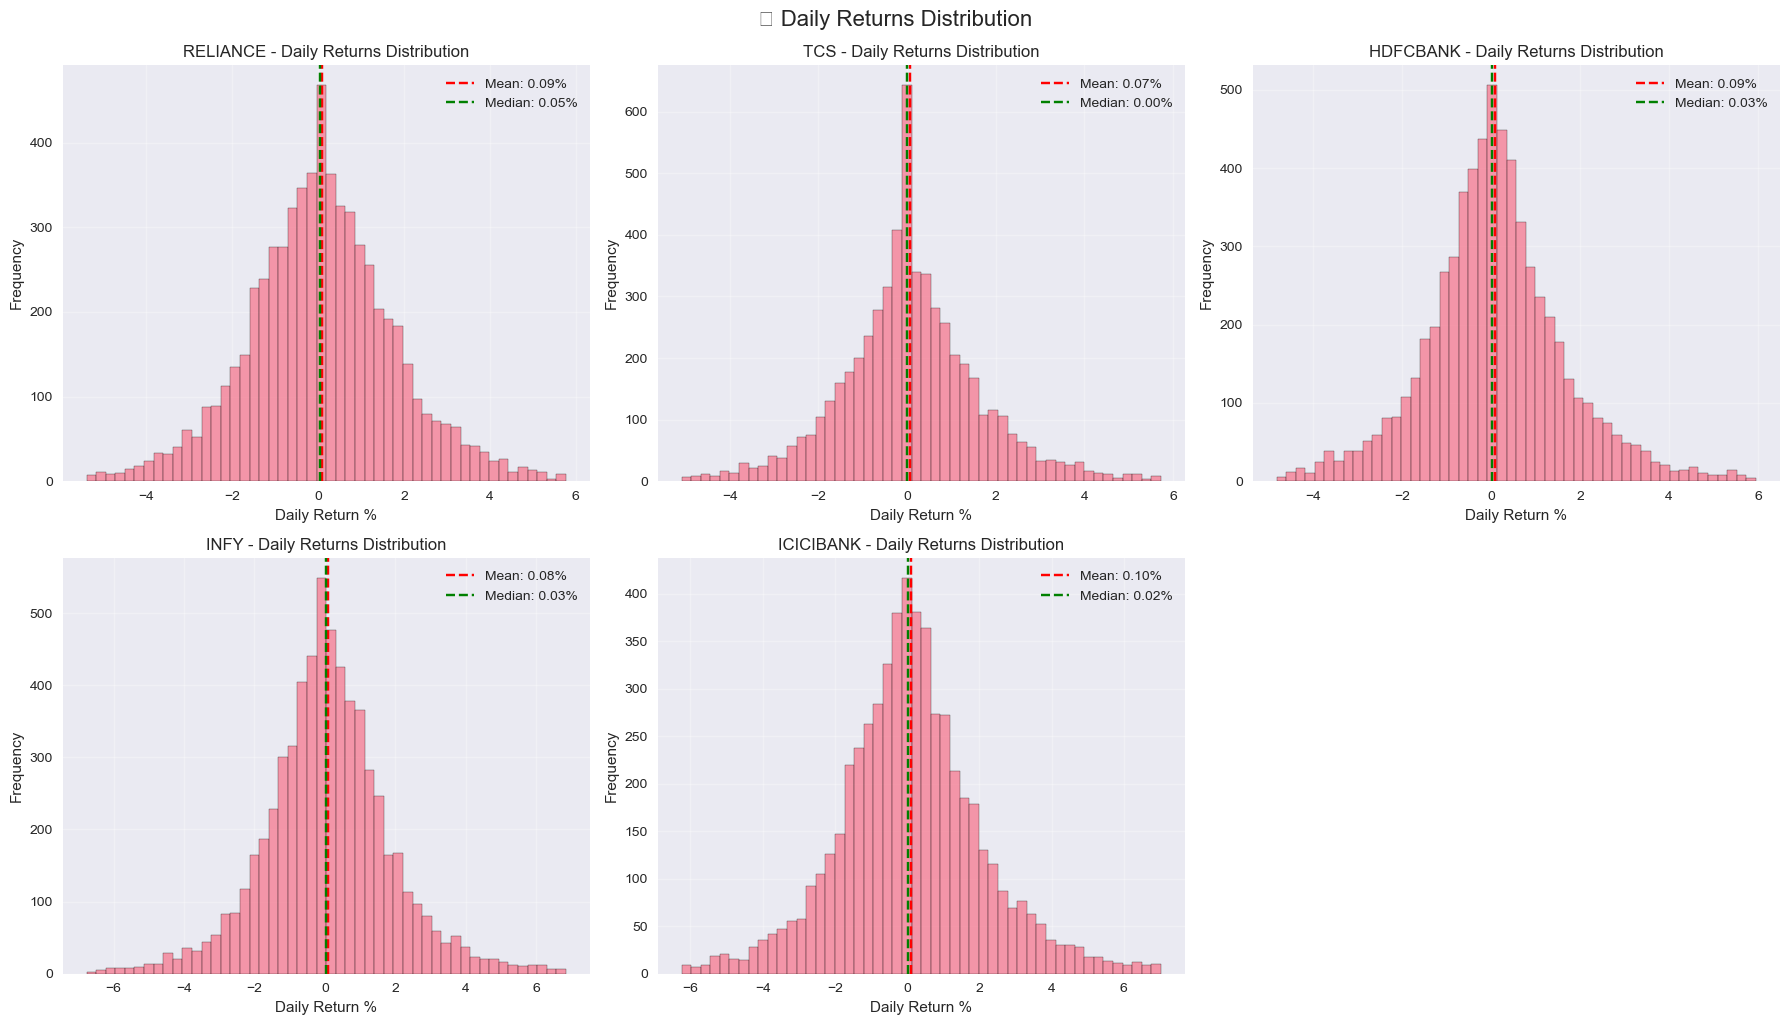

In [45]:
# Returns distribution
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (stock_name, returns) in enumerate(returns_data.items()):
    if i >= 6:
        break
    
    # Filter extreme outliers for better visualization
    filtered_returns = returns[(returns > returns.quantile(0.01)) & 
                              (returns < returns.quantile(0.99))]
    
    axes[i].hist(filtered_returns, bins=50, alpha=0.7, edgecolor='black')
    axes[i].axvline(filtered_returns.mean(), color='red', linestyle='--', 
                   label=f'Mean: {filtered_returns.mean():.2f}%')
    axes[i].axvline(filtered_returns.median(), color='green', linestyle='--', 
                   label=f'Median: {filtered_returns.median():.2f}%')
    axes[i].set_title(f'{stock_name} - Daily Returns Distribution')
    axes[i].set_xlabel('Daily Return %')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

# Remove empty subplot if needed
if len(returns_data) < 6:
    fig.delaxes(axes[len(returns_data)])

plt.tight_layout()
plt.suptitle('📊 Daily Returns Distribution', fontsize=16, y=1.02)
plt.show()

In [46]:
# Risk-Return Analysis
risk_return = []

for stock_name, returns in returns_data.items():
    annual_return = returns.mean() * 252  # Annualized return
    annual_volatility = returns.std() * np.sqrt(252)  # Annualized volatility
    sharpe_ratio = annual_return / annual_volatility if annual_volatility != 0 else 0
    
    risk_return.append({
        'Stock': stock_name,
        'Annual_Return': annual_return,
        'Annual_Volatility': annual_volatility,
        'Sharpe_Ratio': sharpe_ratio
    })

risk_return_df = pd.DataFrame(risk_return)
print("📈 Risk-Return Analysis:")
print(risk_return_df.round(3))

📈 Risk-Return Analysis:
       Stock  Annual_Return  Annual_Volatility  Sharpe_Ratio
0   RELIANCE         33.877             76.111         0.445
1        TCS         31.157             56.858         0.548
2   HDFCBANK         24.508             30.375         0.807
3       INFY         17.990             35.772         0.503
4  ICICIBANK         26.164             37.708         0.694


In [47]:
# Risk-Return Scatter Plot
fig = px.scatter(
    risk_return_df, 
    x='Annual_Volatility', 
    y='Annual_Return',
    text='Stock',
    color='Sharpe_Ratio',
    size='Sharpe_Ratio',
    title='🎯 Risk-Return Profile',
    labels={
        'Annual_Volatility': 'Risk (Annual Volatility %)',
        'Annual_Return': 'Return (Annual Return %)',
        'Sharpe_Ratio': 'Sharpe Ratio'
    },
    color_continuous_scale='RdYlGn'
)

fig.update_traces(textposition = "top center")
fig.update_layout(height=500)
fig.show()

## 7. 🔗 Correlation Analysis

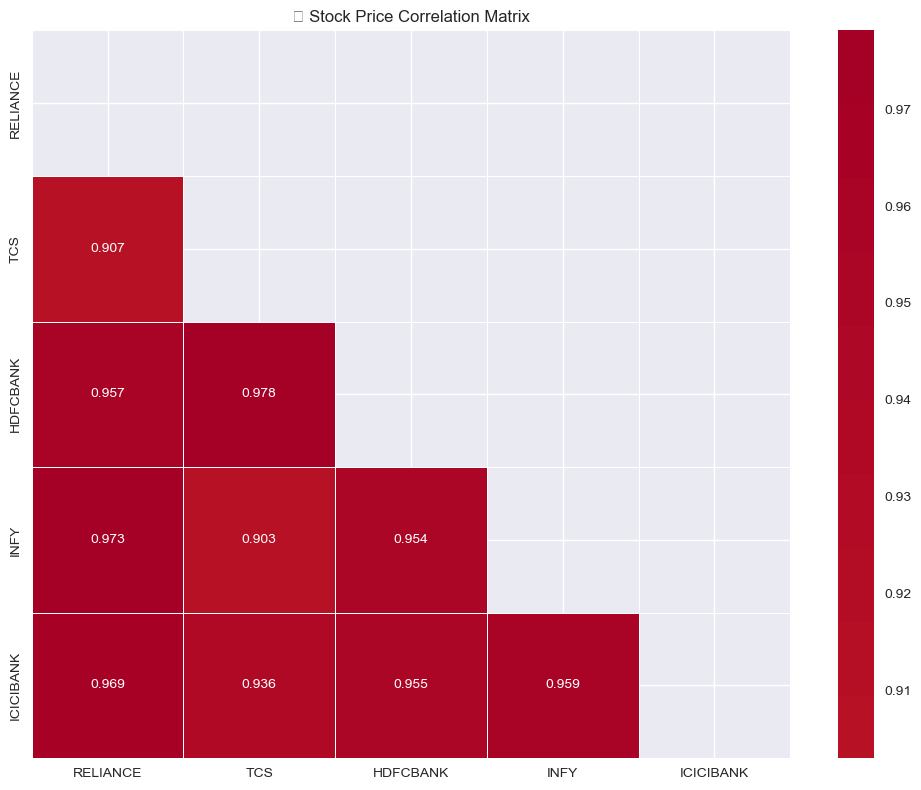

📊 Correlation Summary:
           RELIANCE    TCS  HDFCBANK   INFY  ICICIBANK
RELIANCE      1.000  0.907     0.957  0.973      0.969
TCS           0.907  1.000     0.978  0.903      0.936
HDFCBANK      0.957  0.978     1.000  0.954      0.955
INFY          0.973  0.903     0.954  1.000      0.959
ICICIBANK     0.969  0.936     0.955  0.959      1.000


In [48]:
# Stock price correlation
price_data = {stock_name: df['Close'] for stock_name, df in stock_data.items()}
price_df = pd.DataFrame(price_data)

# Calculate correlation
correlation_matrix = price_df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', 
            center=0, fmt='.3f', linewidths=0.5)
plt.title('🔗 Stock Price Correlation Matrix')
plt.tight_layout()
plt.show()

print("📊 Correlation Summary:")
print(correlation_matrix.round(3))

## 8. 🎯 Model Performance Analysis

In [49]:
# Check if models exist
if os.path.exists('models/base_model.pth') and os.path.exists('models/feature_info.pkl'):
    print("✅ Models found! Running performance analysis...")
    
    # Initialize predictor
    predictor = StockPricePredictor('models')
    
    # Test predictions on all stocks
    prediction_results = []
    
    for stock_name, df in stock_data.items():
        stock_symbol = stock_name + '.NS'
        
        try:
            # Make prediction
            pred_result = predictor.predict_next_day_price(stock_symbol)
            
            if pred_result:
                prediction_results.append({
                    'Stock': stock_name,
                    'Current_Price': pred_result['current_price'],
                    'Predicted_Price': pred_result['predicted_price'],
                    'Change_%': pred_result['price_change'],
                    'Change_Abs': pred_result['price_change_abs'],
                    'Model_Type': pred_result['model_type']
                })
                
        except Exception as e:
            print(f"⚠️ Prediction failed for {stock_name}: {e}")
    
    if prediction_results:
        pred_df = pd.DataFrame(prediction_results)
        print("🔮 Model Predictions:")
        print(pred_df.round(2))
        
        # Visualization
        fig = px.bar(
            pred_df, 
            x='Stock', 
            y='Change_%',
            color='Change_%',
            title='📊 Predicted Price Changes (%)',
            color_continuous_scale='RdYlGn'
        )
        fig.update_layout(height=400)
        fig.show()
    
else:
    print("⚠️ Models not found! Please run training first:")
    print("python src/train.py")

✅ Models found! Running performance analysis...
Model loaded from models/fine_tuned/RELIANCE.pth
Model loaded from models/fine_tuned/TCS.pth
Model loaded from models/fine_tuned/HDFCBANK.pth
Model loaded from models/fine_tuned/INFY.pth
Model loaded from models/fine_tuned/ICICIBANK.pth
🔮 Model Predictions:
       Stock  Current_Price  Predicted_Price  Change_%  Change_Abs  Model_Type
0   RELIANCE        1376.20          1366.88     -0.68       -9.32  fine_tuned
1        TCS        3049.40          1767.22    -42.05    -1282.18  fine_tuned
2   HDFCBANK         965.15          1004.02      4.03       38.87  fine_tuned
3       INFY        1504.30          1431.19     -4.86      -73.11  fine_tuned
4  ICICIBANK        1403.70          1380.12     -1.68      -23.58  fine_tuned


## 9. 📊 Market Trend Analysis

In [50]:
# Analyze overall market trends
# Calculate market index (equal weighted)
market_prices = price_df.mean(axis=1)
market_returns = market_prices.pct_change() * 100

# Recent market performance (last 1 year)
recent_market = market_prices.tail(252)
recent_returns = market_returns.tail(252)

print("📈 Market Summary (Last 1 Year):")
print(f"Market Return: {((recent_market.iloc[-1] / recent_market.iloc[0]) - 1) * 100:.2f}%")
print(f"Average Daily Return: {recent_returns.mean():.3f}%")
print(f"Daily Volatility: {recent_returns.std():.3f}%")
print(f"Max Drawdown: {((recent_market / recent_market.cummax()) - 1).min() * 100:.2f}%")

# Bull/Bear market periods
rolling_returns = market_prices.pct_change(20) * 100  # 20-day returns
bull_periods = rolling_returns > 5  # More than 5% gain in 20 days
bear_periods = rolling_returns < -5  # More than 5% loss in 20 days

print(f"🐂 Bull Market Days (>5% in 20 days): {bull_periods.sum()}")
print(f"🐻 Bear Market Days (<-5% in 20 days): {bear_periods.sum()}")

📈 Market Summary (Last 1 Year):
Market Return: -9.67%
Average Daily Return: -0.040%
Daily Volatility: 0.975%
Max Drawdown: -18.53%
🐂 Bull Market Days (>5% in 20 days): 1356
🐻 Bear Market Days (<-5% in 20 days): 563


In [51]:
# Market trend visualization
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=['Market Index (Equal Weighted)', 'Market Daily Returns'],
    vertical_spacing=0.1
)

# Market Index
fig.add_trace(
    go.Scatter(
        x=recent_market.index,
        y=recent_market,
        mode='lines',
        name='Market Index',
        line=dict(color='blue', width=2)
    ),
    row=1, col=1
)

# Returns histogram
fig.add_trace(
    go.Histogram(
        x=recent_returns.dropna(),
        nbinsx=30,
        name='Daily Returns',
        marker_color='lightblue',
        opacity=0.7
    ),
    row=2, col=1
)

fig.update_layout(
    height=600,
    title="📊 Market Trend Analysis (Last 1 Year)",
    showlegend=False
)

fig.show()

## 10. 🎯 Key Insights & Summary

In [52]:
print("="*60)
print("📊 STOCK MARKET ANALYSIS - KEY INSIGHTS")
print("="*60)

# 1. Best and worst performers
ytd_performance = {}
for stock_name, df in stock_data.items():
    if len(df) > 252:  # At least 1 year of data
        year_return = ((df['Close'].iloc[-1] / df['Close'].iloc[-252]) - 1) * 100
        ytd_performance[stock_name] = year_return

if ytd_performance:
    best_performer = max(ytd_performance, key=ytd_performance.get)
    worst_performer = min(ytd_performance, key=ytd_performance.get)
    
    print(f"🏆 PERFORMANCE (Last 1 Year):")
    print(f"Best Performer: {best_performer} (+{ytd_performance[best_performer]:.2f}%)")
    print(f"Worst Performer: {worst_performer} ({ytd_performance[worst_performer]:.2f}%)")
    print(f"Average Return: {np.mean(list(ytd_performance.values())):.2f}%")

# 2. Volatility analysis
volatility_ranking = {stock: returns.std() * np.sqrt(252) for stock, returns in returns_data.items()}
most_volatile = max(volatility_ranking, key=volatility_ranking.get)
least_volatile = min(volatility_ranking, key=volatility_ranking.get)

print(f"📈 VOLATILITY ANALYSIS:")
print(f"Most Volatile: {most_volatile} ({volatility_ranking[most_volatile]:.2f}% annual)")
print(f"Least Volatile: {least_volatile} ({volatility_ranking[least_volatile]:.2f}% annual)")

# 3. Correlation insights
avg_correlation = correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, 1)].mean()
print(f"🔗 CORRELATION INSIGHTS:")
print(f"Average Stock Correlation: {avg_correlation:.3f}")
print(f"Market Integration: {'High' if avg_correlation > 0.7 else 'Medium' if avg_correlation > 0.5 else 'Low'}")

# 4. Technical signals summary
if 'df_with_indicators' in locals():
    current_rsi = df_with_indicators['RSI'].iloc[-1]
    current_macd = df_with_indicators['MACD'].iloc[-1]
    
    print(f"🔍 TECHNICAL SIGNALS ({sample_stock}):")
    print(f"RSI: {current_rsi:.2f} ({'Overbought' if current_rsi > 70 else 'Oversold' if current_rsi < 30 else 'Neutral'})")
    print(f"MACD: {current_macd:.4f} ({'Bullish' if current_macd > 0 else 'Bearish'})")

# 5. Model insights (if available)
if 'prediction_results' in locals() and prediction_results:
    bullish_count = sum(1 for p in prediction_results if p['Change_%'] > 0)
    bearish_count = len(prediction_results) - bullish_count
    avg_predicted_change = np.mean([p['Change_%'] for p in prediction_results])
    
    print(f"🔮 MODEL PREDICTIONS:")
    print(f"Bullish Signals: {bullish_count}/{len(prediction_results)}")
    print(f"Bearish Signals: {bearish_count}/{len(prediction_results)}")
    print(f"Average Predicted Change: {avg_predicted_change:+.2f}%")
    print(f"Market Sentiment: {'Bullish' if avg_predicted_change > 0 else 'Bearish'}")

print(f"📝 DATA SUMMARY:")
print(f"Stocks Analyzed: {len(stock_data)}")
print(f"Date Range: {min(df.index.min() for df in stock_data.values())} to {max(df.index.max() for df in stock_data.values())}")
print(f"Total Data Points: {sum(len(df) for df in stock_data.values()):,}")

print("n" + "="*60)
print("✅ ANALYSIS COMPLETE!")
print("="*60)

📊 STOCK MARKET ANALYSIS - KEY INSIGHTS
🏆 PERFORMANCE (Last 1 Year):
Best Performer: HDFCBANK (+20.54%)
Worst Performer: TCS (-30.40%)
Average Return: -3.47%
📈 VOLATILITY ANALYSIS:
Most Volatile: RELIANCE (76.11% annual)
Least Volatile: HDFCBANK (30.37% annual)
🔗 CORRELATION INSIGHTS:
Average Stock Correlation: 0.949
Market Integration: High
🔍 TECHNICAL SIGNALS (('RELIANCE',)):
RSI: 36.11 (Neutral)
MACD: -11.7073 (Bearish)
🔮 MODEL PREDICTIONS:
Bullish Signals: 1/5
Bearish Signals: 4/5
Average Predicted Change: -9.05%
Market Sentiment: Bearish
📝 DATA SUMMARY:
Stocks Analyzed: 5
Date Range: 0 to 6411
Total Data Points: 30,722
n============================================================
✅ ANALYSIS COMPLETE!
